Since I did not work on Time Series models before, I was able to reach this stage with a one-step result in the given time.
<br>
This study was made for municipality 0. Desired results can be obtained when the same procedures are performed for other municipalities.
<br>
After using SARIMAX as a simple model, the LSTM model, which is a Deep Learning model, was used to increase success.
<br>
When I have the opportunity to develop myself more in Time Series models, I can make beautiful projects in a short time.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# makes strings colored
import colorama
from colorama import Fore, Style
from termcolor import colored

import ipywidgets
from ipywidgets import interact

# White grid plots for dark mode users
sns.set_style("whitegrid")



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.style.use('dark_background')
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
import math
from sklearn.metrics import mean_squared_error

In [3]:
#!pip install pmdarima

In [4]:
df= pd.read_csv("municipality_bus_utilization.csv")
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [6]:
df.describe()

,municipality_id,usage,total_capacity
count,13070.000,13070.000,13070.000
mean,4.500,876.003,1972.800
std,2.872,679.287,1144.075
min,0.000,11.000,397.000
25%,2.000,403.000,697.000
50%,4.500,692.000,1974.500
75%,7.000,1190.000,2947.000
max,9.000,3508.000,3893.000


In [7]:
df.isnull().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        13070 non-null  datetime64[ns]
 1   municipality_id  13070 non-null  int64         
 2   usage            13070 non-null  int64         
 3   total_capacity   13070 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 408.6 KB


In [10]:
df.duplicated().sum()

0

# Timestamp

In [11]:
df["timestamp"].min()

Timestamp('2017-06-04 07:59:42')

In [12]:
df["timestamp"].max()

Timestamp('2017-08-19 16:30:35')

In [13]:
df["timestamp"].sample(10)

10221   2017-08-02 08:28:48
10346   2017-08-02 14:25:50
6206    2017-07-09 13:27:04
7742    2017-07-18 10:01:06
12649   2017-08-17 13:27:17
6591    2017-07-11 15:00:21
10507   2017-08-05 13:29:09
4283    2017-06-29 15:26:52
10884   2017-08-07 14:26:23
5208    2017-07-04 08:26:32
Name: timestamp, dtype: datetime64[ns]

In [14]:
df["timestamp"].sort_values()

0       2017-06-04 07:59:42
1       2017-06-04 07:59:42
2       2017-06-04 07:59:42
3       2017-06-04 07:59:42
4       2017-06-04 07:59:42
                ...        
13064   2017-08-19 16:30:35
13065   2017-08-19 16:30:35
13066   2017-08-19 16:30:35
13067   2017-08-19 16:30:35
13069   2017-08-19 16:30:35
Name: timestamp, Length: 13070, dtype: datetime64[ns]

# municipality_id	 

In [15]:
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [16]:
df.municipality_id.unique()

array([9, 8, 4, 0, 7, 5, 2, 1, 6, 3], dtype=int64)

In [17]:
df.municipality_id.value_counts()

7    1307
6    1307
5    1307
4    1307
3    1307
2    1307
9    1307
1    1307
8    1307
0    1307
Name: municipality_id, dtype: int64

In [18]:
df.groupby("municipality_id")["usage"].sum().sort_values(ascending=False)

municipality_id
4    3014607
7    1502120
3    1409291
6    1340748
8    1335421
9     877381
0     719586
2     636502
1     389579
5     224124
Name: usage, dtype: int64

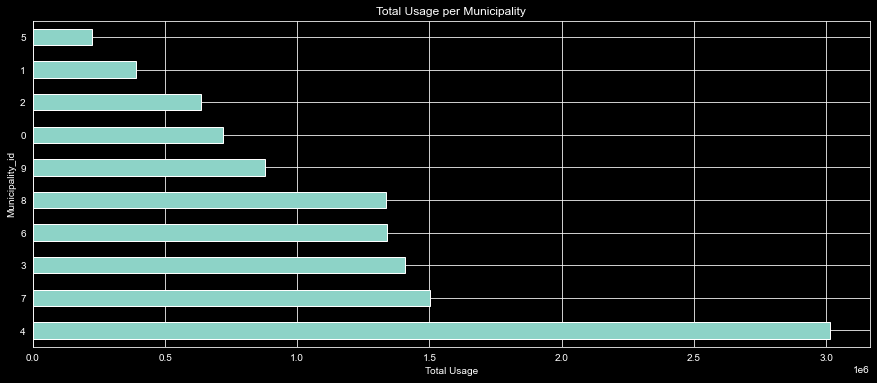

In [19]:
plt.figure(figsize = (15,6))
df.groupby("municipality_id")["usage"].sum().sort_values(ascending=False).plot.barh()
plt.title("Total Usage per Municipality")
plt.xlabel("Total Usage")
plt.ylabel("Municipality_id")
plt.xticks(rotation = 0)

plt.show();

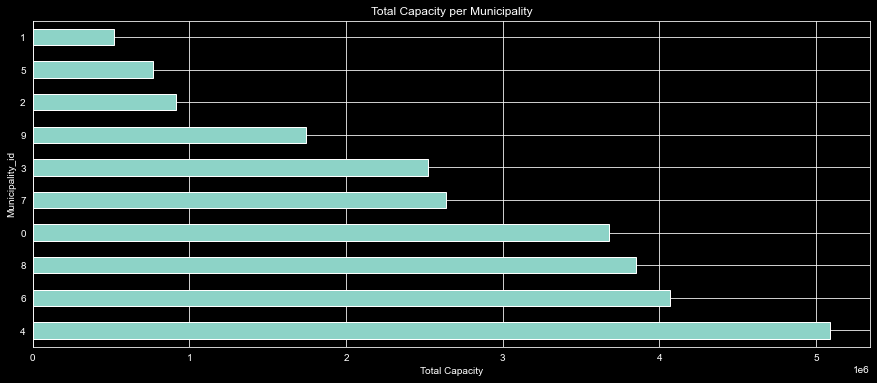

In [20]:
plt.figure(figsize = (15,6))
df.groupby("municipality_id")["total_capacity"].sum().sort_values(ascending=False).plot.barh()
plt.title("Total Capacity per Municipality")
plt.xlabel("Total Capacity")
plt.ylabel("Municipality_id")
plt.xticks(rotation = 0)

plt.show();

# Prepare the model

In [21]:
df.pop("total_capacity")

0        1332
1        2947
2        3893
3        2813
4        2019
         ... 
13065     697
13066    2947
13067    2019
13068    3113
13069    1930
Name: total_capacity, Length: 13070, dtype: int64

In [22]:
df['time'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df["hour"]=df['timestamp'].dt.hour

In [23]:
df.head(1)

,timestamp,municipality_id,usage,time,month,day,hour
0,2017-06-04 07:59:42,9,454,2017-06-04,6,4,7


In [24]:
df0 =df.loc[df["municipality_id"] == 0]
df1 =df.loc[df["municipality_id"] == 1]
df2 =df.loc[df["municipality_id"] == 2]
df3 =df.loc[df["municipality_id"] == 3]
df4 =df.loc[df["municipality_id"] == 4]
df5 =df.loc[df["municipality_id"] == 5]
df6 =df.loc[df["municipality_id"] == 6]
df7 =df.loc[df["municipality_id"] == 7]
df8 =df.loc[df["municipality_id"] == 8]
df9 =df.loc[df["municipality_id"] == 9]

In [25]:
df0.head()

,timestamp,municipality_id,usage,time,month,day,hour
3,2017-06-04 07:59:42,0,204,2017-06-04,6,4,7
18,2017-06-04 08:25:42,0,247,2017-06-04,6,4,8
29,2017-06-04 08:59:42,0,332,2017-06-04,6,4,8
34,2017-06-04 09:32:46,0,429,2017-06-04,6,4,9
47,2017-06-04 09:59:48,0,485,2017-06-04,6,4,9


In [26]:
df0.hour.value_counts()

13    152
9     149
11    146
15    145
14    145
8     145
12    142
10    141
16    116
7      26
Name: hour, dtype: int64

In [27]:
df0.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

timestamp
2017-06-04 07:00:00    204.000
2017-06-04 08:00:00    332.000
2017-06-04 09:00:00    485.000
2017-06-04 10:00:00    583.000
2017-06-04 11:00:00    614.000
                        ...   
2017-08-19 12:00:00   1281.000
2017-08-19 13:00:00   1283.000
2017-08-19 14:00:00   1285.000
2017-08-19 15:00:00   1286.000
2017-08-19 16:00:00   1276.000
Freq: H, Name: usage, Length: 1834, dtype: float64

In [28]:
df0=df0.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
df0 = pd.DataFrame(df0)
df0

,usage
timestamp,
2017-06-04 07:00:00,204.000
2017-06-04 08:00:00,332.000
2017-06-04 09:00:00,485.000
2017-06-04 10:00:00,583.000
2017-06-04 11:00:00,614.000
...,...
2017-08-19 12:00:00,1281.000
2017-08-19 13:00:00,1283.000
2017-08-19 14:00:00,1285.000


In [29]:
df0.bfill(inplace=True)

In [30]:
df0.head(18)

,usage
timestamp,
2017-06-04 07:00:00,204.000
2017-06-04 08:00:00,332.000
2017-06-04 09:00:00,485.000
2017-06-04 10:00:00,583.000
2017-06-04 11:00:00,614.000
2017-06-04 12:00:00,613.000
2017-06-04 13:00:00,605.000
2017-06-04 14:00:00,585.000
2017-06-04 15:00:00,520.000


In [29]:
#df0.fillna(0,inplace=True)

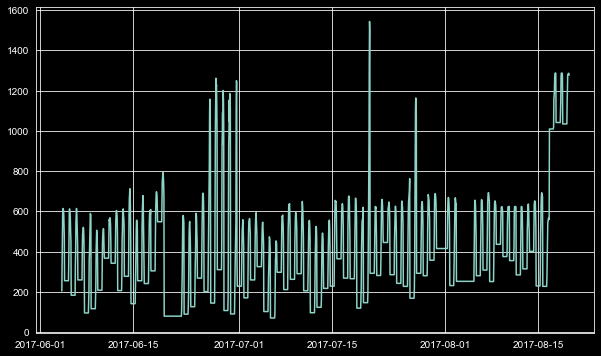

In [31]:
plt.plot(df0['usage'])

In [32]:
adf_test= ADFTest(alpha=0.05)
adf_test.should_diff(df0)

(0.01, False)

In [33]:
from logging import critical
from statsmodels.tsa.stattools import adfuller

In [34]:
adf, pvalue, usedlag_, nobs_, criticl_values_, icbest_=adfuller(df0)
pvalue

0.31391266612275837

In [35]:
decomposed= seasonal_decompose(df0['usage'],model='additive')

In [36]:
trend= decomposed.trend
seasonal= decomposed.seasonal
residual= decomposed.resid

In [37]:
from cProfile import label
from turtle import color

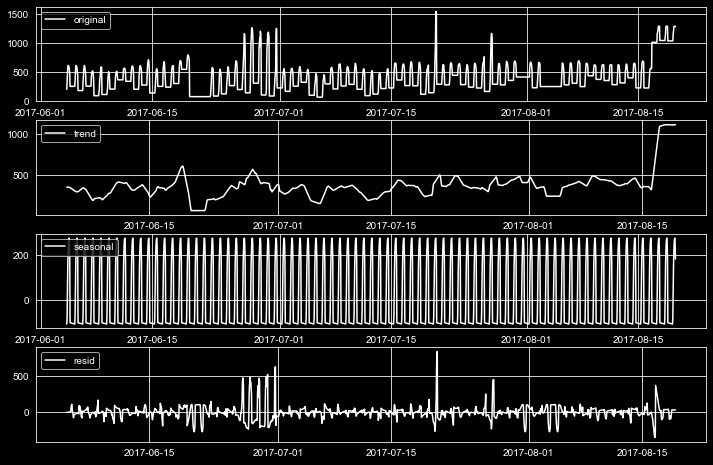

In [39]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df0['usage'],label='original',color='white')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='trend',color='white')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='seasonal',color='white')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label='resid',color='white')
plt.legend(loc='upper left')
plt.show()

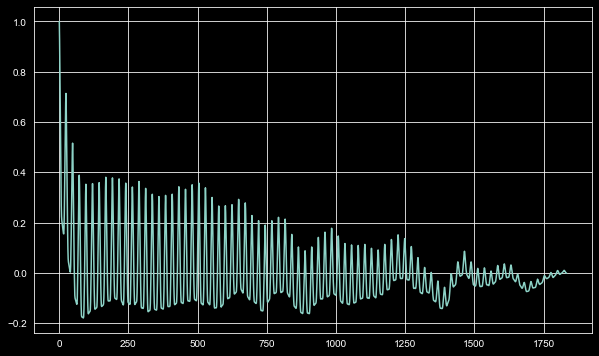

In [40]:
acf_1834 = acf(df0.usage,nlags=1834) #lags bir gecikmeyi temsil ediyor. sıfırın üzerindeki otokorelasyon pozitif ve tam tersi de negatif korelasyon olduğunu anlatıyor.
plt.plot(acf_1834)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

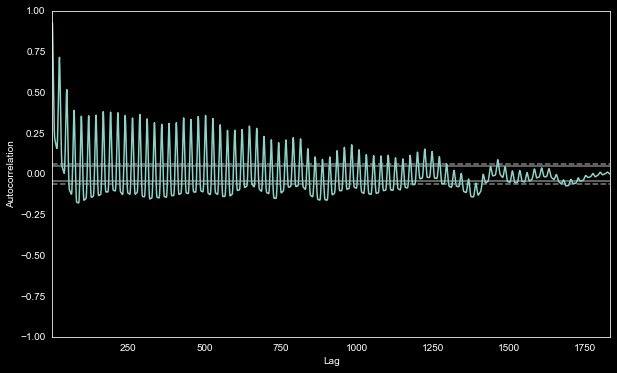

In [41]:
autocorrelation_plot(df0.usage) # güven aralığı daha yüksek olduğu için pandas autocorrelation kullanılması tavsiye edilir
# 40'ın altındaki gecikmelerin (lags) pozitif korelasyonlu olduğu söylenebilir allttaki sonuca bakılarak. bu da demek oluyor ki 40 zamansal gözlem aralığından düşük olma durumu alakalılığı yani korelasyonu artırıyor

In [42]:
arima_model = auto_arima(df0['usage'], start_p=1, d=1,start_q=1, max_p= 5,max_q= 5,
                                           max_d=5, m=12, start_P= 0, D=1, start_Q=0,
                                           max_P=5,max_D=5,max_Q=5, seasonal= True,
                                           error_action= 'ignore',
                                           suppress_warnings=True,
                                           stepwise= True,n_fits=50 )

In [43]:
arima_model

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [44]:
print(arima_model.summary()) # Order (0,1,0)  Seasonal (1,1,[1],12)  SARIMAX

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1834
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood              -10452.152
Date:                              Tue, 15 Nov 2022   AIC                          20910.304
Time:                                      11:49:47   BIC                          20926.826
Sample:                                  06-04-2017   HQIC                         20916.399
                                       - 08-19-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5405      0.009    -62.161      0.000      -0.558      -0.523
ma.S.L12      -0.69

In [45]:
df0[df0.index > pd.to_datetime("2017-08-05", format='%Y-%m-%d')].shape

(352, 1)

In [46]:
df0_val = df0[df0.index > pd.to_datetime("2017-08-05", format='%Y-%m-%d')]

In [47]:
size= 318  #08-05 to 08-19
X_train,X_test= df0[0:size],df0[size:len(df0)]

p, d ve q olmak üzere üç parametresi vardır.
AR (p) Autoregression (Otomatik regresif (Ar (p)) bir bileşen, zaman serileri için regresyon denkleminde geçmiş değerlerin kullanımını ifade eder.)
I(d) integration : gözlemlerin farkını alan bir parametre
MA(q) Moving average : bildiğimiz hareketli ortalama
piramid oto arima p, d ve q değerlerinin optimizasyonunu yapar.

In [48]:
model= SARIMAX(X_train['usage'], order=(0,1,0),seasonal_order=(1,1,1,12))
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                usage   No. Observations:                  318
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1596.173
Date:                              Tue, 15 Nov 2022   AIC                           3198.346
Time:                                      11:50:24   BIC                           3209.506
Sample:                                  06-04-2017   HQIC                          3202.810
                                       - 06-17-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8004      0.018    -43.839      0.000      -0.836      -0.765
ma.S.L12      -0.3515      0.040     -8.872      0.000      -0.429      -0.274
sigma2      1928.9787     72.671     26.544      0.000    1786.546    2071.412
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               727.92
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.12
Prob(H) (two-sided):                  0.93   Kurtosis:                        10.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
start_index = 0
end_index= len(X_train)-1
train_prediction= result.predict(start_index,end_index)

In [50]:
start_index = len(X_train)
end_index= len(df0)-1
prediction= result.predict(start_index,end_index).rename('Predicted usage')

<AxesSubplot:xlabel='timestamp'>

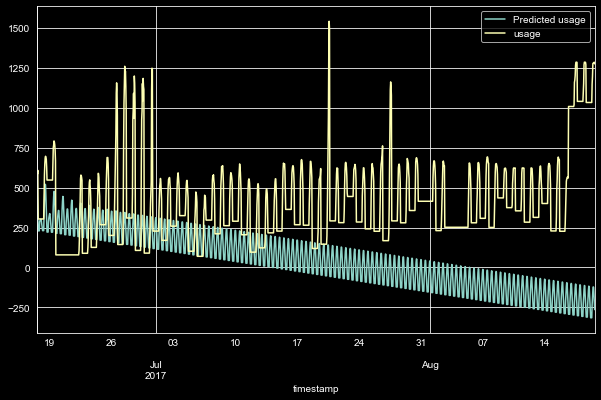

In [51]:
prediction.plot(legend=True)
X_test['usage'].plot(legend=True)

In [52]:
trainScore= math.sqrt(mean_squared_error(X_train,train_prediction))
print(trainScore)
testScore= math.sqrt(mean_squared_error(X_test,prediction))
print(testScore)

50.92976083121372
484.5691481581318


# LSTM

In [54]:
import warnings
import itertools
from math import sqrt
from datetime import datetime
from numpy import concatenate
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, recall_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM, Bidirectional, GRU
from keras.layers import LSTM
from sklearn.utils import shuffle
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
py.init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
import pickle as pkl
plt.style.use('dark_background')
import pickle
from keras.models import load_model
from keras.models import save_model
from keras.models import load_model
import tensorflow as tf
import os
import IPython
import IPython.display
import matplotlib as mpl
mpl.rcParams['figure.figsize']= (8,6)
mpl.rcParams['axes.grid'] = False
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import losses
from keras import optimizers
from keras import metrics

In [56]:
df0.head(1)

,usage
timestamp,
2017-06-04 07:00:00,204.000


In [57]:
df0.shape

(1834, 1)

In [66]:
values = df0[["usage"]].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)
df0.shape

(1834, 1)

In [72]:
train_size = 1516 #08-05 to 08-19
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Gözlem Sayıları (training set, test set): " + str((len(train), len(test))))

Gözlem Sayıları (training set, test set): (1516, 318)


In [73]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i+ window_size, 0])
        # data_Y.append(dataset[i +1+ window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [75]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1514, 1)
New training data shape:
(1514, 1, 1)


In [76]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
  
    model.add(LSTM(128,return_sequences=True,
                   input_shape = (1, window_size), activation='tanh'))
    model.add(LSTM(64,return_sequences=True,
                   input_shape = (1, window_size), activation='tanh'))
    model.add(LSTM(32,return_sequences=True,
                   input_shape = (1, window_size), activation='tanh'))
    model.add(LSTM(16,return_sequences=True,
                   input_shape = (1, window_size), activation='tanh'))
    # model.add(Dropout(0.2))
    model.add(LSTM(8,return_sequences=True,
                   input_shape = (1, window_size), activation='tanh'))
    # model.add(Dropout(0.2))
    model.add(LSTM(4,return_sequences=False,
                   input_shape = (1, window_size), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error",
                  optimizer = "adam",
                  metrics=['RootMeanSquaredError'])
    model.fit(train_X,
              train_Y,
              epochs = 100,
              batch_size = 16,
              verbose = 1,
              validation_split=0.1,
              callbacks=[EarlyStopping(
                                        
                                          monitor='val_loss',
                                          mode='min',
                                          verbose= 1,
                                          patience=15,
                                          restore_best_weights= True
                                          )])
    return(model)
#
# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/100
86/86 [==============================] - 14s 35ms/step - loss: 0.0330 - root_mean_squared_error: 0.1818 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0852
Epoch 2/100
86/86 [==============================] - 1s 10ms/step - loss: 0.0167 - root_mean_squared_error: 0.1291 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0483
Epoch 3/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0085 - root_mean_squared_error: 0.0923 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0417
Epoch 4/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0079 - root_mean_squared_error: 0.0891 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0430
Epoch 5/100
86/86 [==============================] - 1s 11ms/step - loss: 0.0070 - root_mean_squared_error: 0.0839 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376
Epoch 6/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0085 - root_mean_squared_error: 0.0922 - val_loss: 0.0019 - val_ro

In [77]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             12416     
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             3136      
                                                                 
 lstm_4 (LSTM)               (None, 1, 8)              800       
                                                                 
 lstm_5 (LSTM)               (None, 4)                 208       
                                                                 
 dropout (Dropout)           (None, 4)                 0

In [78]:
def predict_and_score(model, X, Y):
    # Şimdi tahminleri 0-1 ile scale edilmiş halinden geri çeviriyoruz.
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    # Rmse değerlerini ölçüyoruz.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)
print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

10/10 [==============================] - 0s 3ms/step
Training data score: 94.75 RMSE
Test data score: 113.42 RMSE


In [ ]:
# We estimate and add what we have learned.
plt.rcParams['axes.facecolor'] = 'black'
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict
# Now we predict the tests.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict
# Let's create the plot.
plt.figure(figsize = (350, 50))
plt.plot(scaler.inverse_transform(dataset[-2500:]), label = "True value")
plt.plot(train_predict_plot[-2500:], label = "Training set prediction")
plt.plot(test_predict_plot[-2500:], label = "Test set prediction")
plt.xlabel("Days")
plt.ylabel("Exchange Rates")
plt.title("Comparison true vs. predicted training / test")
# plt.plot(data['ema_1'],label='True value',alpha=0.5)
# plt.plot(data['ema_2'],label='True value',alpha=0.5)
# plt.plot(data['ema_3'],label='True value',alpha=0.5)
# plt.plot(data['ema_4'],label='True value',alpha=0.5)
# plt.plot(data['ema_5'],label='True value',alpha=0.5)
# plt.plot(data['ema_6'],label='True value',alpha=0.5)
plt.legend()
plt.show()